In [1]:
LOMA_LINDA = '/Users/sarah/Downloads/Rock Datasets/Loma Linda'
INTERNET = '/Users/sarah/Downloads/Rock Datasets/Internet'
ALL = '/Users/sarah/Downloads/Rock Datasets/All'

LOMA_LINDA_CROP = '/Users/sarah/Downloads/Rock Datasets/Loma Linda Cropped'
INTERNET_CROP = '/Users/sarah/Downloads/Rock Datasets/Internet Cropped'
ALL_CROP = '/Users/sarah/Downloads/Rock Datasets/All Cropped'

LL_DRIVE = '/content/drive/MyDrive/Sem VII/RP Investigación/selectedCroppedImagesAllClasses/train' #validate
LL_CROP = '/content/drive/My Drive/Sem VII/RP Investigación/LL Rocks'

In [2]:
IMG_PATH = '/Users/sarah/Documents/Rocks copy/train'
DIR = '/Users/sarah/Documents/Rocks copy/crop'
CSV_DIR = '/content/drive/My Drive/Sem VII/RP Investigación/LL Rocks/last.csv'

IMG_SIZE = (100, 100)
CLUSTERS = 4
images_per_type_to_plot = 2

#### Imports

In [3]:
# Libraries
import cv2, os
from PIL import Image, ImageOps
import numpy as np
from itertools import repeat

def load_images_from_folder(folder, size):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        if(not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))):
            print(filename, 'removed')
            continue
        img = Image.open(os.path.join(folder,filename))
        fit_and_resized_image = ImageOps.fit(img, size, Image.ANTIALIAS)
        img = np.array(fit_and_resized_image)
        img = img[...,:3]
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return (images, filenames)

def load_images_from_directory(path, size):
    paths = os.listdir(path)
    x = []; y = []; files = [];
    for folder in paths:
        if(os.path.isfile(folder)):
            print(folder, 'removed')
            continue
        images, filenames = load_images_from_folder(os.path.join(path, folder), size)
        lbls = list(repeat(folder, len(images)))
        x.extend(images)
        y.extend(lbls)
        files.extend(filenames)
    return (x, y, files)

In [4]:
from sklearn.cluster import KMeans

def get_dominant_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float"); hist /= hist.sum()
    
    features = []
    
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    
    for (percent, color) in colors:
        features.extend(color)
        features.append(percent)

    return features

def get_dominants_plot(features):
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    start = 0
    
    for i in range(4):
        color = np.array(features[i*4:i*4+3])
        percent = features[i*4+3]
        
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), color.astype("uint8").tolist(), -1)
        start = end
        
    return rect

def get_avg_plot(img):
    average = img.mean(axis=0).mean(axis=0)
    avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)
    return avg_patch

#### 1. Load data

In [5]:
x, y, files = load_images_from_directory(IMG_PATH, IMG_SIZE)

classes, indices, counts = np.unique(y, return_counts=True, return_index=True)

classes_dict = dict(zip(classes, range(0,len(classes))))

print('Classes:', classes)
print('Counts:', counts)
print('Indices:', indices)
print('Classes dictionary:', classes_dict)

.DS_Store removed
.DS_Store removed
Classes: ['Diorite' 'Gabbro' 'Granite' 'Granodiorite']
Counts: [78 65 70 70]
Indices: [140 218  70   0]
Classes dictionary: {'Diorite': 0, 'Gabbro': 1, 'Granite': 2, 'Granodiorite': 3}


In [6]:
img_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
for img, name in zip(x, files):
    sh = np.shape(img)
    if(sh != img_shape):
        print('different shape', sh, name)
print('x shape:', np.shape(x), 'y shape:', np.shape(y))

x shape: (283, 100, 100, 3) y shape: (283,)


#### 2. Extract colors from data

In [7]:
xextracted = []
for img in x:
    reshape = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
    cluster = KMeans(n_clusters=CLUSTERS).fit(reshape)
    features = get_dominant_colors(cluster, cluster.cluster_centers_)
    xextracted.append(features)

Color extraction


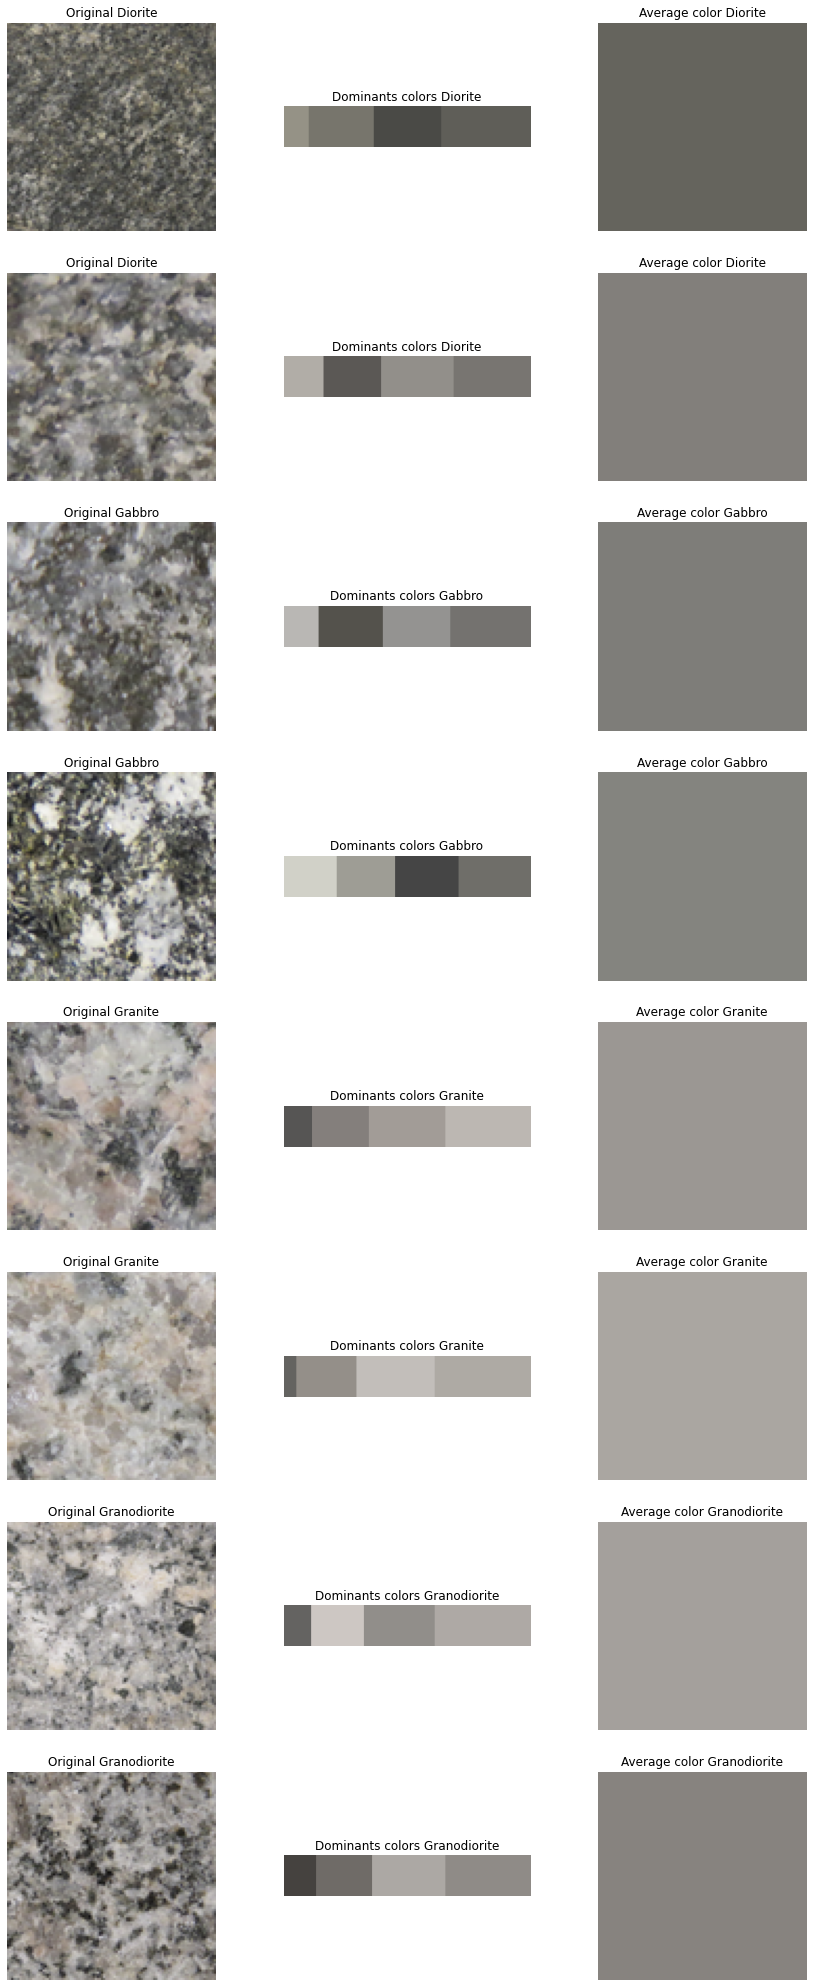

In [8]:
import matplotlib.pyplot as plt

images = []
tittles = []

for idx in indices:
    for i in range(0+1, images_per_type_to_plot+1):
        images.append(x[idx+i])
        images.append(get_dominants_plot(xextracted[idx+i]))
        images.append(get_avg_plot(x[idx+i]))
        tittles.append('Original ' + y[idx+i])
        tittles.append('Dominants colors ' + y[idx+i])
        tittles.append('Average color ' + y[idx+i])
    
rows = len(indices)*images_per_type_to_plot
columns = int(len(images) / rows)

print('Color extraction')
fig, plots = plt.subplots(rows, columns, figsize=(15,18*images_per_type_to_plot))
for row in plots:
    for ax in row:
        ax.imshow(images.pop(0))
        ax.set_title(tittles.pop(0))
        ax.axis('off')
plt.show(fig)

#### 3. Convert extracted data to CSV

In [9]:
yencoded = [classes_dict[c] for c in y]
print(yencoded)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
yencoded2 = label_encoder.fit_transform(y)
print(yencoded2)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
#np.savetxt(CSV_DIR, np.column_stack((xextracted, yencoded)), delimiter=",")

#### 4. Save images cropped to IMG_SIZE

In [12]:
#name = 0
#for img in x:
#    Image.fromarray(img).save(DIR+'/'+str(name)+".png")
#    name+=1

#### Number of clusters

In [13]:
from sklearn.metrics import silhouette_score

img = x[0]
reshape = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

Nclusters = range(2, 20)
kmeans = [KMeans(n_clusters=i) for i in Nclusters]

score = []
distortions = []

for k in kmeans:
    cluster_labels = k.fit_predict(reshape)#k.fit(reshape)
    distortions.appens(k.inertia_)
    score.append(k.score(reshape))
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(reshape, cluster_labels) 
  
    print("For no of clusters =", n_clusters, " The average silhouette_score is :", silhouette_avg)

AttributeError: 'list' object has no attribute 'appens'

In [ ]:
plt.plot(Nclusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(Nclusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()